In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('coaster_db.csv')

In [4]:
df.shape

(1087, 56)

In [5]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
# Droping all columns that we are not going to use
df.drop(['Length', 'Speed','Type','Height restriction', 'Model', 'Height','Inversions', 
         'Lift/launch system', 'Cost', 'Trains', 'Park section','Duration', 'Capacity', 
         'G-force', 'Designer', 'Max vertical angle','Drop', 'Soft opening date', 'Fast Lane available', 
         'Replaced','Track layout', 'Fastrack available', 'Soft opening date.1','Closing date','Opened', 
         'Replaced by', 'Website','Flash Pass Available', 'Must transfer from wheelchair', 'Theme','Single rider line available', 
         'Restraint Style', 'Flash Pass available', 'Acceleration', 'Restraints', 'Name','speed1', 'speed2',
         'speed1_value', 'speed1_unit','height_value', 'height_unit'],axis=1, inplace = True)

In [8]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Opening date           object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [ ]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [10]:
df=df.rename(columns={
    'coaster_name':'Coaster_Name',
    'year_introduced':'Year_Introduced',
    'opening_date_clean':'Opening_Date',
    'speed_mph':'Speed_mph',
    'height_ft':'Height_ft',
    'Inversions_clean':'Inversions',
    'Gforce_clean':'Gforce'
    
})
df.head()

,Coaster_Name,Location,Status,Opening date,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,1901,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,1901,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [11]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Opening date       250
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [12]:
# The code effectively removes duplicate rows from the DataFrame df based on the specified criteria 
# (duplicate values in Coaster_Name, Location, and Opening_Date) and then creates a new,
# clean DataFrame without any duplicates.

df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

## Univatiate Analysis

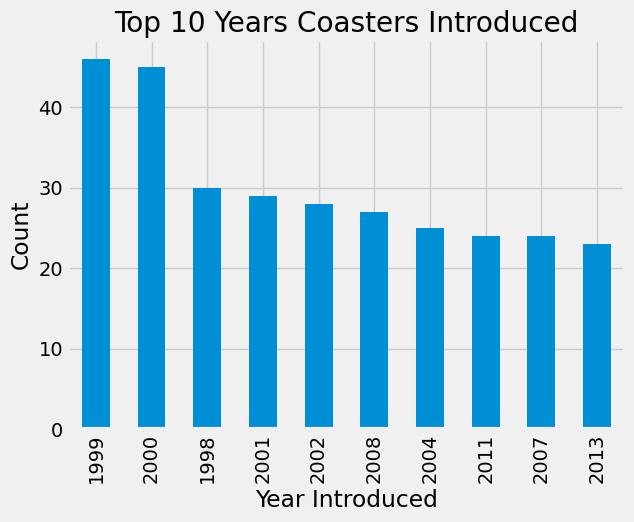

In [13]:
yi_plot = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Introduced')
yi_plot.set_xlabel('Year Introduced')
yi_plot.set_ylabel('Count')
plt.show()

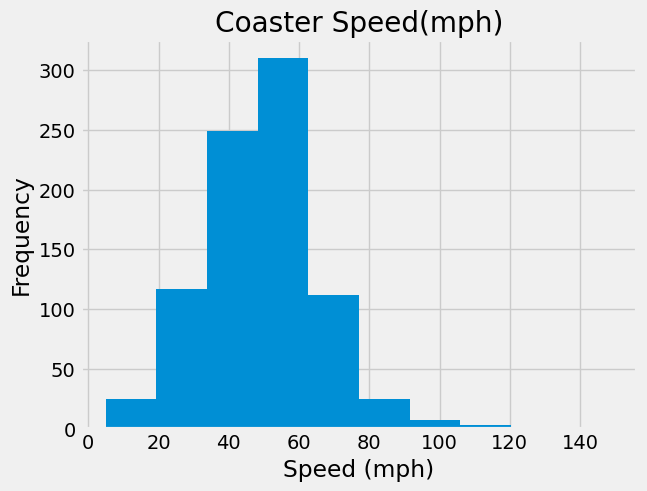

In [14]:
speed_plot = df['Speed_mph'].plot(kind='hist',bins=10,title='Coaster Speed(mph)')
speed_plot.set_xlabel('Speed (mph)')
speed_plot.set_ylabel('Frequency')
plt.show()

## Relationship Plots

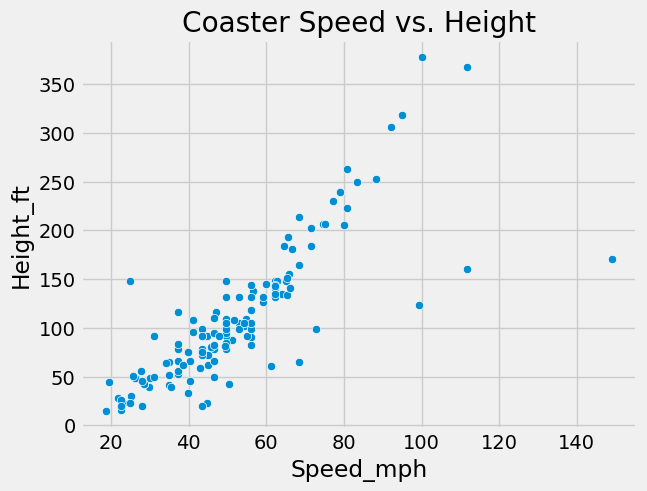

In [15]:
sns.scatterplot(x='Speed_mph', y='Height_ft', data=df)
plt.title('Coaster Speed vs. Height')
plt.show()

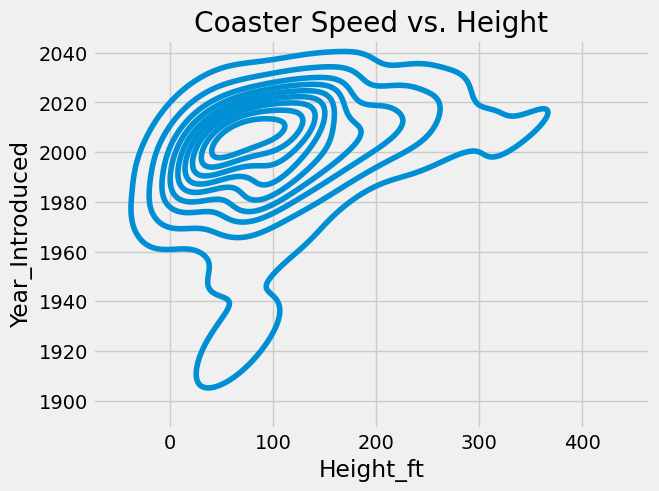

In [16]:
sns.kdeplot(x='Height_ft',y='Year_Introduced', data=df)
plt.title('Coaster Speed vs. Height')
plt.show()

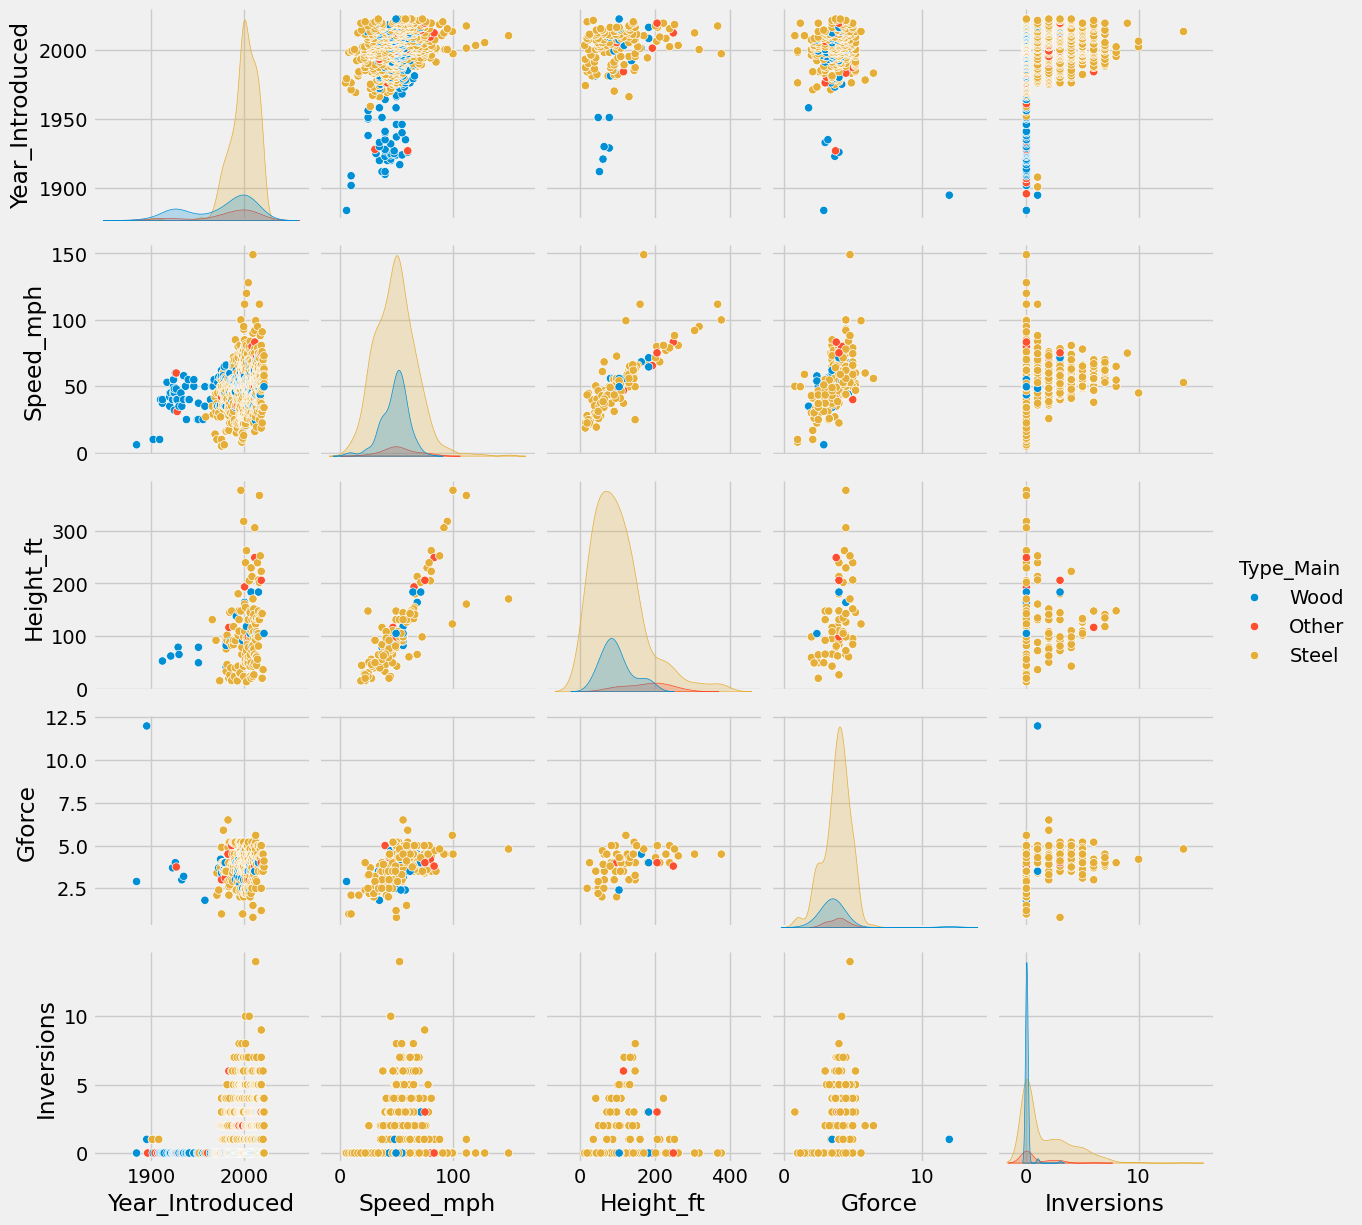

In [20]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Gforce','Inversions'],
            hue='Type_Main')
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.show()

In [17]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


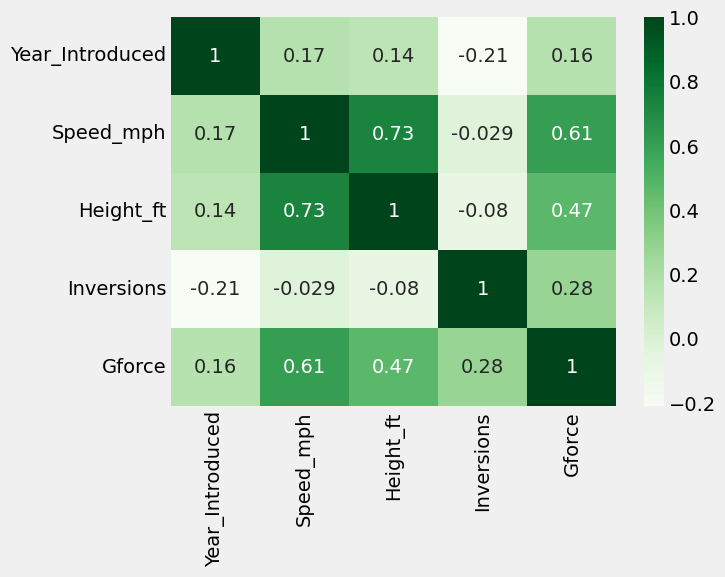

In [18]:
sns.heatmap(df_corr,annot= True, cmap="Greens",)
plt.show()

## Question

#### What are the locations with the fastest roller coasters(min 10)?

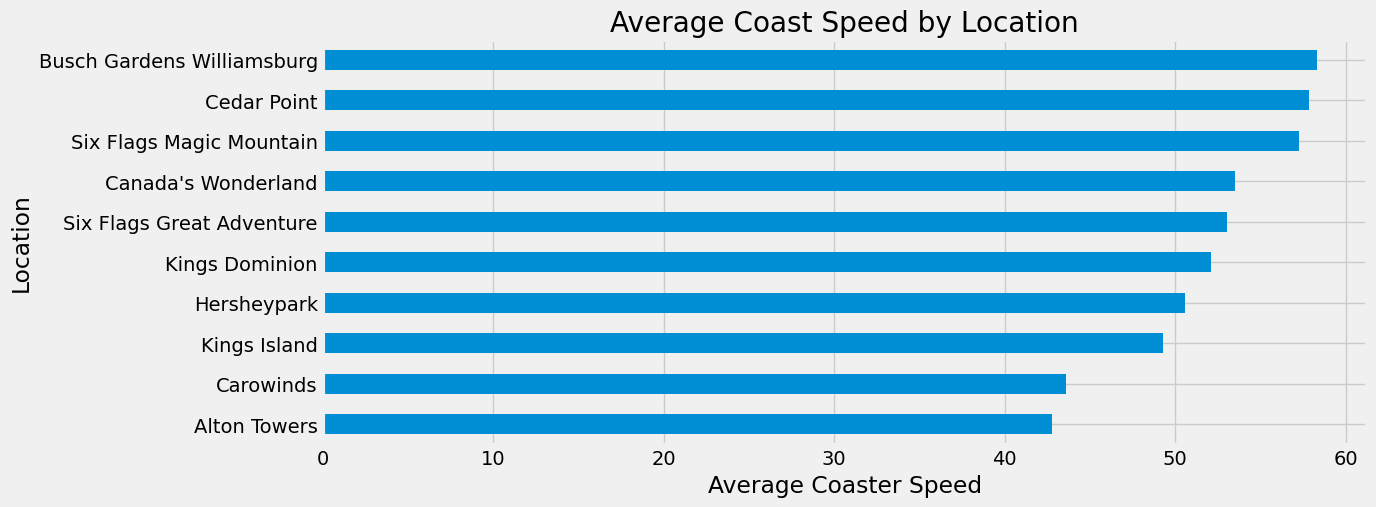

In [19]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()
